#CP PANDAS_LAB_PARTE2
#Rony Ken Nagai
# RM 551549
#2ESPF
---

# Cookbook
This is a repository for short and sweet examples and links for useful pandas recipes. We encourage users to add to this documentation.

Adding interesting links and/or inline examples to this section is a great First Pull Request.

Simplified, condensed, new-user friendly, in-line examples have been inserted where possible to augment the Stack-Overflow and GitHub links. Many of the links contain expanded information, above what the in-line examples offer.

pandas (pd) and NumPy (np) are the only two abbreviated imported modules. The rest are kept explicitly imported for newer users.

In [224]:
import pandas as pd
import numpy as np

## Idioms

These are some neat pandas idioms

[if-then/if-then-else on one column, and assignment to another one or more columns:](https://stackoverflow.com/questions/17128302/python-pandas-idiom-for-if-then-else)

In [225]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)


df


,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


### if-then…
An if-then on one column

In [226]:
df.loc[df.AAA >= 5, "BBB"] = -1

df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


An if-then with assignment to 2 columns:

In [227]:
df.loc[df.AAA >= 5, ["BBB", "CCC"]] = 555

df

,AAA,BBB,CCC
0,4,10,100
1,5,555,555
2,6,555,555
3,7,555,555


Add another line with different logic, to do the -else

In [228]:
df.loc[df.AAA < 5, ["BBB", "CCC"]] = 2000

df

,AAA,BBB,CCC
0,4,2000,2000
1,5,555,555
2,6,555,555
3,7,555,555


Or use pandas where after you’ve set up a mask

In [229]:
df_mask = pd.DataFrame(
    {"AAA": [True] * 4, "BBB": [False] * 4, "CCC": [True, False] * 2}
)

df.where(df_mask, -1000)

,AAA,BBB,CCC
0,4,-1000,2000
1,5,-1000,-1000
2,6,-1000,555
3,7,-1000,-1000


[if-then-else using NumPy’s where()](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)

In [230]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [231]:
df["logic"] = np.where(df["AAA"] > 5, "high", "low")

df

,AAA,BBB,CCC,logic
0,4,10,100,low
1,5,20,50,low
2,6,30,-30,high
3,7,40,-50,high


### Splitting
[Split a frame with a boolean criterion](https://stackoverflow.com/questions/14957116/how-to-split-a-dataframe-according-to-a-boolean-criterion)

In [232]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [233]:
df[df.AAA <= 5]

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [234]:
df[df.AAA > 5]

,AAA,BBB,CCC
2,6,30,-30
3,7,40,-50


### Building criteria
[Select with multi-column criteria](https://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe)

In [235]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


…and (without assignment returns a Series)

In [236]:
df.loc[(df["BBB"] < 25) & (df["CCC"] >= -40), "AAA"]

0    4
1    5
Name: AAA, dtype: int64

…or (without assignment returns a Series)

In [237]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]

0    4
1    5
2    6
3    7
Name: AAA, dtype: int64

…or (with assignment modifies the DataFrame.)

In [238]:
df.loc[(df["BBB"] > 25) | (df["CCC"] >= 75), "AAA"] = 999

df

,AAA,BBB,CCC
0,999,10,100
1,5,20,50
2,999,30,-30
3,999,40,-50


[Select rows with data closest to certain value using argsort](https://stackoverflow.com/questions/17758023/return-rows-in-a-dataframe-closest-to-a-user-defined-number)

In [239]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [240]:
aValue = 43.0

df.loc[(df.CCC - aValue).abs().argsort()]

,AAA,BBB,CCC
1,5,20,50
0,4,10,100
2,6,30,-30
3,7,40,-50


[Dynamically reduce a list of criteria using a binary operators](https://stackoverflow.com/questions/21058254/pandas-boolean-operation-in-a-python-list/21058331)

In [241]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [242]:
Crit1 = df.AAA <= 5.5

Crit2 = df.BBB == 10.0

Crit3 = df.CCC > -40.0

One could hard code:

In [243]:
AllCrit = Crit1 & Crit2 & Crit3

…Or it can be done with a list of dynamically built criteria

In [244]:
import functools

CritList = [Crit1, Crit2, Crit3]

AllCrit = functools.reduce(lambda x, y: x & y, CritList)

df[AllCrit]

,AAA,BBB,CCC
0,4,10,100


## Selection

### Dataframes
The [indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing) docs.

[Using both row labels and value conditionals](https://stackoverflow.com/questions/14725068/pandas-using-row-labels-in-boolean-indexing)

In [277]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [278]:
df[(df.AAA <= 6) & (df.index.isin([0, 2, 4]))]

,AAA,BBB,CCC
0,4,10,100
2,6,30,-30


Use loc for label-oriented slicing and iloc positional slicing [GH 2904](https://github.com/pandas-dev/pandas/issues/2904)

In [279]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]},
    index=["foo", "bar", "boo", "kar"],
)

There are 2 explicit slicing methods, with a third general case

Positional-oriented (Python slicing style : exclusive of end)

1.   Positional-oriented (Python slicing style : exclusive of end)
2.   Label-oriented (Non-Python slicing style : inclusive of end)
3.   General (Either slicing style : depends on if the slice contains labels or positions)

In [280]:
df.loc["bar":"kar"]  # Label

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


In [281]:
# Generic
df[0:3]

,AAA,BBB,CCC
foo,4,10,100
bar,5,20,50
boo,6,30,-30


In [282]:
df["bar":"kar"]

,AAA,BBB,CCC
bar,5,20,50
boo,6,30,-30
kar,7,40,-50


Ambiguity arises when an index consists of integers with a non-zero start or non-unit increment.

In [283]:
data = {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}

df2 = pd.DataFrame(data=data, index=[1, 2, 3, 4])  # Note index starts at 1.

df2.iloc[1:3]  # Position-oriented

,AAA,BBB,CCC
2,5,20,50
3,6,30,-30


In [284]:
df2.loc[1:3]  # Label-oriented

,AAA,BBB,CCC
1,4,10,100
2,5,20,50
3,6,30,-30


[Using inverse operator (~) to take the complement of a mask](https://stackoverflow.com/q/14986510)

In [285]:
df = pd.DataFrame(
    {"AAA": [4, 5, 6, 7], "BBB": [10, 20, 30, 40], "CCC": [100, 50, -30, -50]}
)

df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [286]:
df[~((df.AAA <= 6) & (df.index.isin([0, 2, 4])))]

,AAA,BBB,CCC
1,5,20,50
3,7,40,-50


### New columns

[Efficiently and dynamically creating new columns using DataFrame.map (previously named applymap) ](https://stackoverflow.com/questions/16575868/efficiently-creating-additional-columns-in-a-pandas-dataframe-using-map)

In [287]:
df = pd.DataFrame({"AAA": [1, 2, 1, 3], "BBB": [1, 1, 2, 2], "CCC": [2, 1, 3, 1]})

df

,AAA,BBB,CCC
0,1,1,2
1,2,1,1
2,1,2,3
3,3,2,1


In [288]:
source_cols = df.columns  # Or some subset would work too
new_cols = [str(x) + "_cat" for x in source_cols]
categories = {1: "Alpha", 2: "Beta", 3: "Charlie"}
df[new_cols] = df[source_cols].applymap(categories.get)
df

,AAA,BBB,CCC,AAA_cat,BBB_cat,CCC_cat
0,1,1,2,Alpha,Alpha,Beta
1,2,1,1,Beta,Alpha,Alpha
2,1,2,3,Alpha,Beta,Charlie
3,3,2,1,Charlie,Beta,Alpha


[Keep other columns when using min() with groupby](https://stackoverflow.com/q/23394476)

In [289]:
df = pd.DataFrame(
    {"AAA": [1, 1, 1, 2, 2, 2, 3, 3], "BBB": [2, 1, 3, 4, 5, 1, 2, 3]}
)
df

,AAA,BBB
0,1,2
1,1,1
2,1,3
3,2,4
4,2,5
5,2,1
6,3,2
7,3,3


Method 1 : idxmin() to get the index of the minimums

In [290]:
df.loc[df.groupby("AAA")["BBB"].idxmin()]

,AAA,BBB
1,1,1
5,2,1
6,3,2


Method 2 : sort then take first of each

In [291]:
df.sort_values(by="BBB").groupby("AAA", as_index=False).first()

,AAA,BBB
0,1,1
1,2,1
2,3,2


Notice the same results, with the exception of the index.

## Multiindexing

The [multindexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) docs.

[Creating a MultiIndex from a labeled frame](https://stackoverflow.com/questions/14916358/reshaping-dataframes-in-pandas-based-on-column-labels)

In [292]:
df = pd.DataFrame(
    {
        "row": [0, 1, 2],
        "One_X": [1.1, 1.1, 1.1],
        "One_Y": [1.2, 1.2, 1.2],
        "Two_X": [1.11, 1.11, 1.11],
        "Two_Y": [1.22, 1.22, 1.22],
    }
)

df

,row,One_X,One_Y,Two_X,Two_Y
0,0,1.1,1.2,1.11,1.22
1,1,1.1,1.2,1.11,1.22
2,2,1.1,1.2,1.11,1.22


In [293]:
# As Labelled Index
df = df.set_index("row")
df

,One_X,One_Y,Two_X,Two_Y
row,,,,
0,1.1,1.2,1.11,1.22
1,1.1,1.2,1.11,1.22
2,1.1,1.2,1.11,1.22


In [294]:
# With Hierarchical Columns
df.columns = pd.MultiIndex.from_tuples([tuple(c.split("_")) for c in df.columns])
df

One        Two      
       X    Y     X     Y
row                      
0    1.1  1.2  1.11  1.22
1    1.1  1.2  1.11  1.22
2    1.1  1.2  1.11  1.22

In [295]:
# Now stack & Reset
df = df.stack(0).reset_index(1)
df

,level_1,X,Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


In [296]:
# And fix the labels (Notice the label 'level_1' got added automatically)
df.columns = ["Sample", "All_X", "All_Y"]
df

,Sample,All_X,All_Y
row,,,
0,One,1.10,1.20
0,Two,1.11,1.22
1,One,1.10,1.20
1,Two,1.11,1.22
2,One,1.10,1.20
2,Two,1.11,1.22


### Arithmetic

[Performing arithmetic with a MultiIndex that needs broadcasting](https://stackoverflow.com/questions/19501510/divide-entire-pandas-multiindex-dataframe-by-dataframe-variable/19502176#19502176)

In [297]:
cols = pd.MultiIndex.from_tuples(
    [(x, y) for x in ["A", "B", "C"] for y in ["O", "I"]]
)

df = pd.DataFrame(np.random.randn(2, 6), index=["n", "m"], columns=cols)
df

A                   B                   C          
          O         I         O         I         O         I
n  1.476443  0.110689  0.104096 -1.546800 -0.512333 -0.603015
m  0.295874 -0.809365  0.563835 -1.048269  0.231791 -1.935010

In [298]:
df = df.div(df["C"], level=1)

df

A                   B              C     
          O         I         O         I    O    I
n -2.881803 -0.183558 -0.203180  2.565109  1.0  1.0
m  1.276471  0.418274  2.432518  0.541738  1.0  1.0

### Slicing

[Slicing a MultiIndex with xs](https://stackoverflow.com/questions/12590131/how-to-slice-multindex-columns-in-pandas-dataframes)

In [299]:
coords = [("AA", "one"), ("AA", "six"), ("BB", "one"), ("BB", "two"), ("BB", "six")]

index = pd.MultiIndex.from_tuples(coords)

df = pd.DataFrame([11, 22, 33, 44, 55], index, ["MyData"])

df

MyData
AA one      11
   six      22
BB one      33
   two      44
   six      55

To take the cross section of the 1st level and 1st axis the index:

In [300]:
# Note : level and axis are optional, and default to zero
df.xs("BB", level=0, axis=0)

,MyData
one,33
two,44
six,55


…and now the 2nd level of the 1st axis.

In [301]:
df.xs("six", level=1, axis=0)

,MyData
AA,22
BB,55


[Slicing a MultiIndex with xs, method #2](https://stackoverflow.com/questions/14964493/multiindex-based-indexing-in-pandas)

In [302]:
import itertools

index = list(itertools.product(["Ada", "Quinn", "Violet"], ["Comp", "Math", "Sci"]))

headr = list(itertools.product(["Exams", "Labs"], ["I", "II"]))

indx = pd.MultiIndex.from_tuples(index, names=["Student", "Course"])

cols = pd.MultiIndex.from_tuples(headr)  # Notice these are un-named

data = [[70 + x + y + (x * y) % 3 for x in range(4)] for y in range(9)]

df = pd.DataFrame(data, indx, cols)

df

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Comp      70  71   72  73
        Math      71  73   75  74
        Sci       72  75   75  75
Quinn   Comp      73  74   75  76
        Math      74  76   78  77
        Sci       75  78   78  78
Violet  Comp      76  77   78  79
        Math      77  79   81  80
        Sci       78  81   81  81

In [303]:
All = slice(None)

df.loc["Violet"]

Exams     Labs    
           I  II    I  II
Course                   
Comp      76  77   78  79
Math      77  79   81  80
Sci       78  81   81  81

In [304]:
df.loc[(All, "Math"), All]


Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77
Violet  Math      77  79   81  80

In [305]:
df.loc[(slice("Ada", "Quinn"), "Math"), All]

Exams     Labs    
                   I  II    I  II
Student Course                   
Ada     Math      71  73   75  74
Quinn   Math      74  76   78  77

In [306]:
df.loc[(All, "Math"), ("Exams")]

,,I,II
Student,Course,,
Ada,Math,71,73
Quinn,Math,74,76
Violet,Math,77,79


In [307]:
df.loc[(All, "Math"), (All, "II")]

,,Exams,Labs
,,II,II
Student,Course,,
Ada,Math,73,74
Quinn,Math,76,77
Violet,Math,79,80


[Setting portions of a MultiIndex with xs](https://stackoverflow.com/questions/19319432/pandas-selecting-a-lower-level-in-a-dataframe-to-do-a-ffill)

### Sorting

[Sort by specific column or an ordered list of columns, with a MultiIndex](https://stackoverflow.com/q/14733871)

In [308]:
df.sort_values(by=("Labs", "II"), ascending=False)

Exams     Labs    
                   I  II    I  II
Student Course                   
Violet  Sci       78  81   81  81
        Math      77  79   81  80
        Comp      76  77   78  79
Quinn   Sci       75  78   78  78
        Math      74  76   78  77
        Comp      73  74   75  76
Ada     Sci       72  75   75  75
        Math      71  73   75  74
        Comp      70  71   72  73

Partial selection, the need for sortedness [GH 2995](https://github.com/pandas-dev/pandas/issues/2995)

### Levels
[Prepending a level to a multiindex](https://stackoverflow.com/questions/14744068/prepend-a-level-to-a-pandas-multiindex)

[Flatten Hierarchical columns](https://stackoverflow.com/q/14507794)

## Missing Data
The [missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) docs.

Fill forward a reversed timeseries

In [309]:
df = pd.DataFrame(
    np.random.randn(6, 1),
    index=pd.date_range("2013-08-01", periods=6, freq="B"),
    columns=list("A"),
)

df

,A
2013-08-01,-0.992569
2013-08-02,0.919635
2013-08-05,0.829216
2013-08-06,0.096559
2013-08-07,-0.104129
2013-08-08,-0.305997


In [310]:
df.loc[df.index[3], "A"] = np.nan
df

,A
2013-08-01,-0.992569
2013-08-02,0.919635
2013-08-05,0.829216
2013-08-06,NaN
2013-08-07,-0.104129
2013-08-08,-0.305997


[cumsum reset at NaN values](https://stackoverflow.com/questions/18196811/cumsum-reset-at-nan)

#### Replace
[Using replace with backrefs](https://stackoverflow.com/questions/16818871/extracting-value-and-creating-new-column-out-of-it)

## Grouping
The [grouping](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby) docs.

[Basic grouping with apply](https://stackoverflow.com/questions/15322632/python-pandas-df-groupy-agg-column-reference-in-agg)

Unlike agg, apply’s callable is passed a sub-DataFrame which gives you access to all the columns

In [311]:
df = pd.DataFrame(
    {
        "animal": "cat dog cat fish dog cat cat".split(),
        "size": list("SSMMMLL"),
        "weight": [8, 10, 11, 1, 20, 12, 12],
        "adult": [False] * 5 + [True] * 2,
    }
)

df

,animal,size,weight,adult
0,cat,S,8,False
1,dog,S,10,False
2,cat,M,11,False
3,fish,M,1,False
4,dog,M,20,False
5,cat,L,12,True
6,cat,L,12,True


In [312]:
# List the size of the animals with the highest weight.
df.groupby("animal").apply(lambda subf: subf["size"][subf["weight"].idxmax()])

animal
cat     L
dog     M
fish    M
dtype: object

[Using get_group](https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key)

In [313]:
gb = df.groupby("animal")

gb.get_group("cat")

,animal,size,weight,adult
0,cat,S,8,False
2,cat,M,11,False
5,cat,L,12,True
6,cat,L,12,True


[Apply to different items in a group](https://stackoverflow.com/questions/15262134/apply-different-functions-to-different-items-in-group-object-python-pandas)

In [314]:
def GrowUp(x):
    avg_weight = sum(x[x["size"] == "S"].weight * 1.5)
    avg_weight += sum(x[x["size"] == "M"].weight * 1.25)
    avg_weight += sum(x[x["size"] == "L"].weight)
    avg_weight /= len(x)
    return pd.Series(["L", avg_weight, True], index=["size", "weight", "adult"])
expected_df = gb.apply(GrowUp)

expected_df

,size,weight,adult
animal,,,
cat,L,12.4375,True
dog,L,20.0000,True
fish,L,1.2500,True


[Expanding apply](https://stackoverflow.com/questions/14542145/reductions-down-a-column-in-pandas)

In [315]:
S = pd.Series([i / 100.0 for i in range(1, 11)])

def cum_ret(x, y):
    return x * (1 + y)


def red(x):
    return functools.reduce(cum_ret, x, 1.0)


S.expanding().apply(red, raw=True)

0    1.010000
1    1.030200
2    1.061106
3    1.103550
4    1.158728
5    1.228251
6    1.314229
7    1.419367
8    1.547110
9    1.701821
dtype: float64

[Replacing some values with mean of the rest of a group](https://stackoverflow.com/questions/14760757/replacing-values-with-groupby-means)

In [316]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, -1, 1, 2]})

gb = df.groupby("A")

def replace(g):
    mask = g < 0
    return g.where(~mask, g[~mask].mean())


gb.transform(replace)

,B
0,1
1,1
2,1
3,2


[Sort groups by aggregated data](https://stackoverflow.com/questions/14941366/pandas-sort-by-group-aggregate-and-column)

In [317]:
df = pd.DataFrame(
    {
        "code": ["foo", "bar", "baz"] * 2,
        "data": [0.16, -0.21, 0.33, 0.45, -0.59, 0.62],
        "flag": [False, True] * 3,
    }
)

code_groups = df.groupby("code")

agg_n_sort_order = code_groups[["data"]].transform("sum").sort_values(by="data")

sorted_df = df.loc[agg_n_sort_order.index]

sorted_df

,code,data,flag
1,bar,-0.21,True
4,bar,-0.59,False
0,foo,0.16,False
3,foo,0.45,True
2,baz,0.33,False
5,baz,0.62,True


[Create multiple aggregated columns](https://stackoverflow.com/questions/14897100/create-multiple-columns-in-pandas-aggregation-function)

In [318]:
rng = pd.date_range(start="2014-10-07", periods=10, freq="2min")

ts = pd.Series(data=list(range(10)), index=rng)

def MyCust(x):
    if len(x) > 2:
        return x.iloc[1] * 1.234
    return pd.NaT

mhc = {"Mean": "mean", "Max": "max", "Custom": MyCust}

ts.resample("5min").apply(mhc)

,Mean,Max,Custom
2014-10-07 00:00:00,1.0,2,1.234
2014-10-07 00:05:00,3.5,4,NaT
2014-10-07 00:10:00,6.0,7,7.404
2014-10-07 00:15:00,8.5,9,NaT


In [319]:
ts

2014-10-07 00:00:00    0
2014-10-07 00:02:00    1
2014-10-07 00:04:00    2
2014-10-07 00:06:00    3
2014-10-07 00:08:00    4
2014-10-07 00:10:00    5
2014-10-07 00:12:00    6
2014-10-07 00:14:00    7
2014-10-07 00:16:00    8
2014-10-07 00:18:00    9
Freq: 2T, dtype: int64

[Create a value counts column and reassign back to the DataFrame](https://stackoverflow.com/q/17709270)

In [320]:
df = pd.DataFrame(
    {"Color": "Red Red Red Blue".split(), "Value": [100, 150, 50, 50]}
)

df

,Color,Value
0,Red,100
1,Red,150
2,Red,50
3,Blue,50


In [321]:
df["Counts"] = df.groupby(["Color"]).transform(len)

df

,Color,Value,Counts
0,Red,100,3
1,Red,150,3
2,Red,50,3
3,Blue,50,1


[Shift groups of the values in a column based on the index](https://stackoverflow.com/q/23198053/190597)

In [322]:
df = pd.DataFrame(
    {"line_race": [10, 10, 8, 10, 10, 8], "beyer": [99, 102, 103, 103, 88, 100]},
    index=[
        "Last Gunfighter",
        "Last Gunfighter",
        "Last Gunfighter",
        "Paynter",
        "Paynter",
        "Paynter",
    ],
)

df

,line_race,beyer
Last Gunfighter,10,99
Last Gunfighter,10,102
Last Gunfighter,8,103
Paynter,10,103
Paynter,10,88
Paynter,8,100


In [323]:
df["beyer_shifted"] = df.groupby(level=0)["beyer"].shift(1)

df

,line_race,beyer,beyer_shifted
Last Gunfighter,10,99,NaN
Last Gunfighter,10,102,99.0
Last Gunfighter,8,103,102.0
Paynter,10,103,NaN
Paynter,10,88,103.0
Paynter,8,100,88.0


[Select row with maximum value from each group](https://stackoverflow.com/q/26701849/190597)

In [324]:
df = pd.DataFrame(
    {
        "host": ["other", "other", "that", "this", "this"],
        "service": ["mail", "web", "mail", "mail", "web"],
        "no": [1, 2, 1, 2, 1],
    }
).set_index(["host", "service"])


mask = df.groupby(level=0).agg("idxmax")

df_count = df.loc[mask["no"]].reset_index()

df_count

,host,service,no
0,other,web,2
1,that,mail,1
2,this,mail,2


[Grouping like Python’s itertools.groupby](https://stackoverflow.com/q/29142487/846892)

In [325]:
df = pd.DataFrame([0, 1, 0, 1, 1, 1, 0, 1, 1], columns=["A"])

df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).groups

{1: [0], 2: [1], 3: [2], 4: [3, 4, 5], 5: [6], 6: [7, 8]}

In [326]:
df["A"].groupby((df["A"] != df["A"].shift()).cumsum()).cumsum()

0    0
1    1
2    0
3    1
4    2
5    3
6    0
7    1
8    2
Name: A, dtype: int64

### Expanding data
[Alignment and to-date](https://stackoverflow.com/questions/15489011/python-time-series-alignment-and-to-date-functions)

[Rolling Computation window based on values instead of counts](https://stackoverflow.com/questions/14300768/pandas-rolling-computation-with-window-based-on-values-instead-of-counts)

[Rolling Mean by Time Interval](https://stackoverflow.com/questions/15771472/pandas-rolling-mean-by-time-interval)

### Splitting

[Splitting a frame](https://stackoverflow.com/questions/13353233/best-way-to-split-a-dataframe-given-an-edge/15449992#15449992)

Create a list of dataframes, split using a delineation based on logic included in rows.

In [327]:
df = pd.DataFrame(
    data={
        "Case": ["A", "A", "A", "B", "A", "A", "B", "A", "A"],
        "Data": np.random.randn(9),
    }
)


dfs = list(
    zip(
        *df.groupby(
            (1 * (df["Case"] == "B"))
            .cumsum()
            .rolling(window=3, min_periods=1)
            .median()
        )
    )
)[-1]

In [328]:
dfs[0]

,Case,Data
0,A,-1.038490
1,A,0.207234
2,A,0.039153
3,B,-0.559556


In [329]:
dfs[1]

,Case,Data
4,A,-0.723557
5,A,-1.068828
6,B,1.361218


In [330]:
dfs[2]

,Case,Data
7,A,-0.244466
8,A,-0.941013


### Pivot
The [Pivot](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot) docs.

[Partial sums and subtotals](https://stackoverflow.com/a/15574875)

In [331]:
df = pd.DataFrame(
    data={
        "Province": ["ON", "QC", "BC", "AL", "AL", "MN", "ON"],
        "City": [
            "Toronto",
            "Montreal",
            "Vancouver",
            "Calgary",
            "Edmonton",
            "Winnipeg",
            "Windsor",
        ],
        "Sales": [13, 6, 16, 8, 4, 3, 1],
    }
)

table = pd.pivot_table(
    df,
    values=["Sales"],
    index=["Province"],
    columns=["City"],
    aggfunc="sum",
    margins=True,
)

table.stack("City")

Sales
Province City            
AL       All         12.0
         Calgary      8.0
         Edmonton     4.0
BC       All         16.0
         Vancouver   16.0
MN       All          3.0
         Winnipeg     3.0
ON       All         14.0
         Toronto     13.0
         Windsor      1.0
QC       All          6.0
         Montreal     6.0
All      All         51.0
         Calgary      8.0
         Edmonton     4.0
         Montreal     6.0
         Toronto     13.0
         Vancouver   16.0
         Windsor      1.0
         Winnipeg     3.0

[Frequency table like plyr in R](https://stackoverflow.com/questions/15589354/frequency-tables-in-pandas-like-plyr-in-r)

In [332]:
grades = [48, 99, 75, 80, 42, 80, 72, 68, 36, 78]

df = pd.DataFrame(
    {
        "ID": ["x%d" % r for r in range(10)],
        "Gender": ["F", "M", "F", "M", "F", "M", "F", "M", "M", "M"],
        "ExamYear": [
            "2007",
            "2007",
            "2007",
            "2008",
            "2008",
            "2008",
            "2008",
            "2009",
            "2009",
            "2009",
        ],
        "Class": [
            "algebra",
            "stats",
            "bio",
            "algebra",
            "algebra",
            "stats",
            "stats",
            "algebra",
            "bio",
            "bio",
        ],
        "Participated": [
            "yes",
            "yes",
            "yes",
            "yes",
            "no",
            "yes",
            "yes",
            "yes",
            "yes",
            "yes",
        ],
        "Passed": ["yes" if x > 50 else "no" for x in grades],
        "Employed": [
            True,
            True,
            True,
            False,
            False,
            False,
            False,
            True,
            True,
            False,
        ],
        "Grade": grades,
    }
)

df.groupby("ExamYear").agg(
    {
        "Participated": lambda x: x.value_counts()["yes"],
        "Passed": lambda x: sum(x == "yes"),
        "Employed": lambda x: sum(x),
        "Grade": lambda x: sum(x) / len(x),
    }
)

,Participated,Passed,Employed,Grade
ExamYear,,,,
2007,3,2,3,74.000000
2008,3,3,0,68.500000
2009,3,2,2,60.666667


[Plot pandas DataFrame with year over year data](https://stackoverflow.com/questions/30379789/plot-pandas-data-frame-with-year-over-year-data)

To create year and month cross tabulation:

In [333]:
df = pd.DataFrame(
    {"value": np.random.randn(36)},
    index=pd.date_range("2011-01-01", freq="M", periods=36),
)

pd.pivot_table(
    df, index=df.index.month, columns=df.index.year, values="value", aggfunc="sum"
)

,2011,2012,2013
1,-0.347457,-0.709372,0.026926
2,-0.603441,0.676342,0.079973
3,-1.616777,1.302237,-0.294699
4,-0.957908,-1.221895,-0.694920
5,0.282663,-0.339935,1.831923
6,-0.533744,-0.386866,-1.115055
7,-1.031826,-0.365876,1.261372
8,-1.197279,-0.362720,-0.861882
9,0.691773,1.070167,-0.897083
10,1.608138,0.081504,-1.714833


### Apply

[Rolling apply to organize - Turning embedded lists into a MultiIndex frame](https://stackoverflow.com/questions/17349981/converting-pandas-dataframe-with-categorical-values-into-binary-values)

In [334]:
df = pd.DataFrame(
    data={
        "A": [[2, 4, 8, 16], [100, 200], [10, 20, 30]],
        "B": [["a", "b", "c"], ["jj", "kk"], ["ccc"]],
    },
    index=["I", "II", "III"],
)

def SeriesFromSubList(aList):
    return pd.Series(aList)

df_orgz = pd.concat(
    {ind: row.apply(SeriesFromSubList) for ind, row in df.iterrows()}
)

df_orgz

0     1     2     3
I   A    2     4     8  16.0
    B    a     b     c   NaN
II  A  100   200   NaN   NaN
    B   jj    kk   NaN   NaN
III A   10  20.0  30.0   NaN
    B  ccc   NaN   NaN   NaN

[Rolling apply with a DataFrame returning a Series](https://stackoverflow.com/questions/19121854/using-rolling-apply-on-a-dataframe-object)

Rolling Apply to multiple columns where function calculates a Series before a Scalar from the Series is returned

In [335]:
df = pd.DataFrame(
    data=np.random.randn(2000, 2) / 10000,
    index=pd.date_range("2001-01-01", periods=2000),
    columns=["A", "B"],
)

df

,A,B
2001-01-01,0.000126,0.000170
2001-01-02,-0.000075,0.000020
2001-01-03,0.000248,0.000014
2001-01-04,0.000162,0.000150
2001-01-05,0.000055,-0.000182
...,...,...
2006-06-19,-0.000126,0.000055
2006-06-20,-0.000220,0.000238
2006-06-21,-0.000152,-0.000082
2006-06-22,0.000042,0.000130


In [336]:
def gm(df, const):
    v = ((((df["A"] + df["B"]) + 1).cumprod()) - 1) * const
    return v.iloc[-1]

s = pd.Series(
    {
        df.index[i]: gm(df.iloc[i: min(i + 51, len(df) - 1)], 5)
        for i in range(len(df) - 50)
    }
)

s

2001-01-01    0.003146
2001-01-02    0.000896
2001-01-03   -0.000166
2001-01-04   -0.000877
2001-01-05   -0.003643
                ...   
2006-04-30   -0.000879
2006-05-01   -0.000640
2006-05-02   -0.002608
2006-05-03   -0.002075
2006-05-04   -0.001653
Length: 1950, dtype: float64

[Rolling apply with a DataFrame returning a Scalar](https://stackoverflow.com/questions/21040766/python-pandas-rolling-apply-two-column-input-into-function/21045831#21045831)

Rolling Apply to multiple columns where function returns a Scalar (Volume Weighted Average Price)

In [337]:
rng = pd.date_range(start="2014-01-01", periods=100)

df = pd.DataFrame(
    {
        "Open": np.random.randn(len(rng)),
        "Close": np.random.randn(len(rng)),
        "Volume": np.random.randint(100, 2000, len(rng)),
    },
    index=rng,
)

df

,Open,Close,Volume
2014-01-01,0.894874,-0.621182,992
2014-01-02,0.666700,1.822118,1765
2014-01-03,0.613522,-0.147199,1388
2014-01-04,0.713600,2.036378,1284
2014-01-05,0.697459,1.973583,1466
...,...,...,...
2014-04-06,-0.036948,1.082706,1412
2014-04-07,0.742170,0.647513,286
2014-04-08,0.022561,-0.263825,1511
2014-04-09,0.911015,-1.205998,544


In [338]:
def vwap(bars):
    return (bars.Close * bars.Volume).sum() / bars.Volume.sum()

window = 5

s = pd.concat(
    [
        (pd.Series(vwap(df.iloc[i: i + window]), index=[df.index[i + window]]))
        for i in range(len(df) - window)
    ]
)

s.round(2)

2014-01-06    1.15
2014-01-07    1.33
2014-01-08    0.82
2014-01-09    0.92
2014-01-10    0.60
              ... 
2014-04-06   -0.54
2014-04-07    0.23
2014-04-08    0.81
2014-04-09    0.49
2014-04-10    0.13
Length: 95, dtype: float64

## Timeseries

[Between times](https://stackoverflow.com/questions/14539992/pandas-drop-rows-outside-of-time-range)

[Using indexer between time](https://stackoverflow.com/questions/17559885/pandas-dataframe-mask-based-on-index)

[Constructing a datetime range that excludes weekends and includes only certain times](https://stackoverflow.com/a/24014440)

[Vectorized Lookup](https://stackoverflow.com/questions/13893227/vectorized-look-up-of-values-in-pandas-dataframe)

[Aggregation and plotting time series](https://nipunbatra.github.io/blog/visualisation/2013/05/01/aggregation-timeseries.html)

Turn a matrix with hours in columns and days in rows into a continuous row sequence in the form of a time series. [How to rearrange a Python pandas DataFrame?](https://stackoverflow.com/questions/15432659/how-to-rearrange-a-python-pandas-dataframe)

[Dealing with duplicates when reindexing a timeseries to a specified frequency](https://stackoverflow.com/questions/22244383/pandas-df-refill-adding-two-columns-of-different-shape)

Calculate the first day of the month for each entry in a DatetimeIndex:

In [339]:
dates = pd.date_range("2000-01-01", periods=5)

dates.to_period(freq="M").to_timestamp()

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01'],
              dtype='datetime64[ns]', freq=None)

### Resampling
The [Resample](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-resampling) docs.

[Using Grouper instead of TimeGrouper for time grouping of values](https://stackoverflow.com/questions/15297053/how-can-i-divide-single-values-of-a-dataframe-by-monthly-averages)

[Time grouping with some missing values](https://stackoverflow.com/questions/33637312/pandas-grouper-by-frequency-with-completeness-requirement)

Valid frequency arguments to Grouper [Timeseries](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases)

[Grouping using a MultiIndex](https://stackoverflow.com/questions/41483763/pandas-timegrouper-on-multiindex)

Using TimeGrouper and another grouping to create subgroups, then apply a custom function [GH 3791](https://github.com/pandas-dev/pandas/issues/3791)

[Resampling with custom periods](https://stackoverflow.com/questions/15408156/resampling-with-custom-periods)

[Resample intraday frame without adding new days](https://stackoverflow.com/questions/14898574/resample-intrday-pandas-dataframe-without-add-new-days)

[Resample minute data](https://stackoverflow.com/questions/14861023/resampling-minute-data)

[Resample with groupby](https://stackoverflow.com/q/18677271/564538)

## Merge
The [Join](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) docs.

[Concatenate two dataframes with overlapping index (emulate R rbind)](https://stackoverflow.com/questions/14988480/pandas-version-of-rbind)

In [340]:
rng = pd.date_range("2000-01-01", periods=6)

df1 = pd.DataFrame(np.random.randn(6, 3), index=rng, columns=["A", "B", "C"])

df2 = df1.copy()

Depending on df construction, ``ignore_index`` may be needed

In [341]:
df = pd.concat([df1, df2], ignore_index=True)

df

,A,B,C
0,-1.568516,0.003814,-0.371180
1,1.393535,0.510414,-0.726147
2,0.328477,0.476452,-0.689069
3,-0.187097,-1.033177,0.001245
4,0.212996,-0.630918,0.325741
5,-0.465620,-0.645164,-0.890678
6,-1.568516,0.003814,-0.371180
7,1.393535,0.510414,-0.726147
8,0.328477,0.476452,-0.689069
9,-0.187097,-1.033177,0.001245


Self Join of a DataFrame [GH 2996](https://github.com/pandas-dev/pandas/issues/2996)

In [342]:
df = pd.DataFrame(
    data={
        "Area": ["A"] * 5 + ["C"] * 2,
        "Bins": [110] * 2 + [160] * 3 + [40] * 2,
        "Test_0": [0, 1, 0, 1, 2, 0, 1],
        "Data": np.random.randn(7),
    }
)

df

,Area,Bins,Test_0,Data
0,A,110,0,0.515671
1,A,110,1,-1.259102
2,A,160,0,0.297731
3,A,160,1,-1.681508
4,A,160,2,0.044457
5,C,40,0,1.045822
6,C,40,1,-0.181568


In [343]:
df["Test_1"] = df["Test_0"] - 1

pd.merge(
    df,
    df,
    left_on=["Bins", "Area", "Test_0"],
    right_on=["Bins", "Area", "Test_1"],
    suffixes=("_L", "_R"),
)

,Area,Bins,Test_0_L,Data_L,Test_1_L,Test_0_R,Data_R,Test_1_R
0,A,110,0,0.515671,-1,1,-1.259102,0
1,A,160,0,0.297731,-1,1,-1.681508,0
2,A,160,1,-1.681508,0,2,0.044457,1
3,C,40,0,1.045822,-1,1,-0.181568,0


[How to set the index and join](https://stackoverflow.com/questions/14341805/pandas-merge-pd-merge-how-to-set-the-index-and-join)

[KDB like asof join](https://stackoverflow.com/questions/12322289/kdb-like-asof-join-for-timeseries-data-in-pandas/12336039#12336039)

[Join with a criteria based on the values](https://stackoverflow.com/questions/15581829/how-to-perform-an-inner-or-outer-join-of-dataframes-with-pandas-on-non-simplisti)

[Using searchsorted to merge based on values inside a range](https://stackoverflow.com/questions/25125626/pandas-merge-with-logic/2512764)

## Plotting

The [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

[Make Matplotlib look like R](https://stackoverflow.com/questions/14349055/making-matplotlib-graphs-look-like-r-by-default)

[Setting x-axis major and minor labels](https://stackoverflow.com/questions/12945971/pandas-timeseries-plot-setting-x-axis-major-and-minor-ticks-and-labels)

[Plotting multiple charts in an IPython Jupyter notebook](https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell)

[Creating a multi-line plot](https://stackoverflow.com/questions/16568964/make-a-multiline-plot-from-csv-file-in-matplotlib)

[Plotting a heatmap](https://stackoverflow.com/questions/17050202/plot-timeseries-of-histograms-in-python)

[Annotate a time-series plot](https://stackoverflow.com/questions/11067368/annotate-time-series-plot-in-matplotlib)

[Annotate a time-series plot #2](https://stackoverflow.com/questions/17891493/annotating-points-from-a-pandas-dataframe-in-matplotlib-plot)

[Generate Embedded plots in excel files using Pandas, Vincent and xlsxwriter](https://pandas-xlsxwriter-charts.readthedocs.io/)

[Boxplot for each quartile of a stratifying variable](https://stackoverflow.com/questions/23232989/boxplot-stratified-by-column-in-python-pandas)

<Axes: title={'center': 'price'}, xlabel='quartiles'>

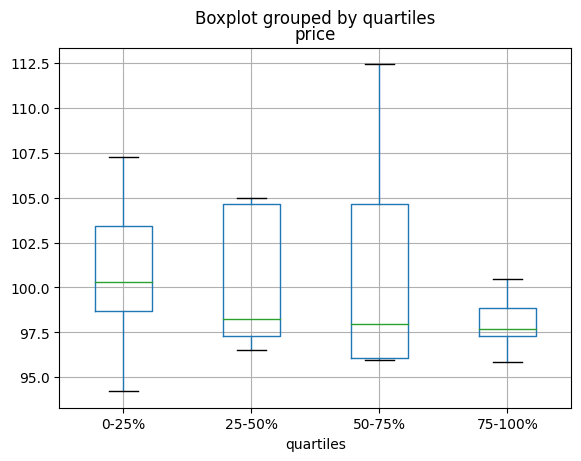

In [344]:
df = pd.DataFrame(
    {
        "stratifying_var": np.random.uniform(0, 100, 20),
        "price": np.random.normal(100, 5, 20),
    }
)


df["quartiles"] = pd.qcut(
    df["stratifying_var"], 4, labels=["0-25%", "25-50%", "50-75%", "75-100%"]
)


df.boxplot(column="price", by="quartiles")

## Data in/out
[Performance comparison of SQL vs HDF5](https://stackoverflow.com/q/16628329)

### CSV

The [CSV](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table) docs

[read_csv in action](https://wesmckinney.com/blog/update-on-upcoming-pandas-v0-10-new-file-parser-other-performance-wins/)

[appending to a csv](https://stackoverflow.com/questions/17134942/pandas-dataframe-output-end-of-csv)

[Reading a csv chunk-by-chunk](https://stackoverflow.com/questions/11622652/large-persistent-dataframe-in-pandas/12193309#12193309)

[Reading only certain rows of a csv chunk-by-chunk](https://stackoverflow.com/questions/19674212/pandas-data-frame-select-rows-and-clear-memory)

[Reading the first few lines of a frame](https://stackoverflow.com/questions/15008970/way-to-read-first-few-lines-for-pandas-dataframe)

Reading a file that is compressed but not by `gzip/bz2` (the native compressed formats which `read_csv` understands). This example shows a `WinZipped` file, but is a general application of opening the file within a context manager and using that handle to read. [See here](https://stackoverflow.com/questions/17789907/pandas-convert-winzipped-csv-file-to-data-frame)

I[nferring dtypes from a file](https://stackoverflow.com/questions/15555005/get-inferred-dataframe-types-iteratively-using-chunksize)

Dealing with bad lines [GH 2886](https://github.com/pandas-dev/pandas/issues/2886)

[Write a multi-row index CSV without writing duplicates](https://stackoverflow.com/questions/17349574/pandas-write-multiindex-rows-with-to-csv)

#### Reading multiple files to create a single DataFrame

The best way to combine multiple files into a single DataFrame is to read the individual frames one by one, put all of the individual frames into a list, and then combine the frames in the list using `pd.concat()`:

In [345]:
for i in range(3):
    data = pd.DataFrame(np.random.randn(10, 4))
    data.to_csv("file_{}.csv".format(i))


files = ["file_0.csv", "file_1.csv", "file_2.csv"]

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

You can use the same approach to read all files matching a pattern. Here is an example using `glob`:

In [346]:
import glob

import os

files = glob.glob("file_*.csv")

result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

Finally, this strategy will work with the other ``pd.read_*(...)`` functions described in the [io docs](https://pandas.pydata.org/docs/user_guide/io.html#io).

#### Parsing date components in multi-columns

Parsing date components in multi-columns is faster with a format

In [347]:
i = pd.date_range("20000101", periods=10000)

df = pd.DataFrame({"year": i.year, "month": i.month, "day": i.day})

df.head()

,year,month,day
0,2000,1,1
1,2000,1,2
2,2000,1,3
3,2000,1,4
4,2000,1,5


In [348]:
%timeit pd.to_datetime(df.year * 10000 + df.month * 100 + df.day, format='%Y%m%d')
ds = df.apply(lambda x: "%04d%02d%02d" % (x["year"], x["month"], x["day"]), axis=1)
ds.head()
%timeit pd.to_datetime(ds)

7.43 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.94 ms ± 96.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Skip row between header and data

In [349]:
data = """;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
 ;;;;
;;;;
 ;;;;
 ;;;;
;;;;
date;Param1;Param2;Param4;Param5
    ;m²;°C;m²;m
;;;;
01.01.1990 00:00;1;1;2;3
01.01.1990 01:00;5;3;4;5
01.01.1990 02:00;9;5;6;7
01.01.1990 03:00;13;7;8;9
01.01.1990 04:00;17;9;10;11
01.01.1990 05:00;21;11;12;13
"""

##### Option 1: pass rows explicitly to skip rows

In [350]:
from io import StringIO

pd.read_csv(
    StringIO(data),
    sep=";",
    skiprows=[11, 12],
    index_col=0,
    parse_dates=True,
    header=10,
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


##### Option 2: read column names and then data

In [351]:
pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

Index(['date', 'Param1', 'Param2', 'Param4', 'Param5'], dtype='object')

In [352]:
columns = pd.read_csv(StringIO(data), sep=";", header=10, nrows=10).columns

pd.read_csv(
    StringIO(data), sep=";", index_col=0, header=12, parse_dates=True, names=columns
)

,Param1,Param2,Param4,Param5
date,,,,
1990-01-01 00:00:00,1,1,2,3
1990-01-01 01:00:00,5,3,4,5
1990-01-01 02:00:00,9,5,6,7
1990-01-01 03:00:00,13,7,8,9
1990-01-01 04:00:00,17,9,10,11
1990-01-01 05:00:00,21,11,12,13


### SQL

The [SQL](https://pandas.pydata.org/docs/user_guide/io.html#io-sql) docs

[Reading from databases with SQL](https://stackoverflow.com/questions/10065051/python-pandas-and-databases-like-mysql)

### Excel

The [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel) docs

[Reading from a filelike handle](https://stackoverflow.com/questions/15588713/sheets-of-excel-workbook-from-a-url-into-a-pandas-dataframe)

[Modifying formatting in XlsxWriter output](https://pbpython.com/improve-pandas-excel-output.html)

Loading only visible sheets [GH 19842#issuecomment-892150745](https://github.com/pandas-dev/pandas/issues/19842#issuecomment-892150745)

### HTML
[Reading HTML tables from a server that cannot handle the default request header](https://stackoverflow.com/a/18939272/564538)

### HDFStore

The [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5) docs

[Simple queries with a Timestamp Index](https://stackoverflow.com/questions/13926089/selecting-columns-from-pandas-hdfstore-table)

Managing heterogeneous data using a linked multiple table hierarchy [GH 3032](https://github.com/pandas-dev/pandas/issues/3032)

[Merging on-disk tables with millions of rows](https://stackoverflow.com/questions/14614512/merging-two-tables-with-millions-of-rows-in-python/14617925#14617925)

[Avoiding inconsistencies when writing to a store from multiple processes/threads](https://stackoverflow.com/a/29014295/2858145)

De-duplicating a large store by chunks, essentially a recursive reduction operation. Shows a function for taking in data from csv file and creating a store by chunks, with date parsing as well. [See here](https://stackoverflow.com/questions/16110252/need-to-compare-very-large-files-around-1-5gb-in-python/16110391#16110391)

[Creating a store chunk-by-chunk from a csv file](https://stackoverflow.com/questions/20428355/appending-column-to-frame-of-hdf-file-in-pandas/20428786#20428786)

[Appending to a store, while creating a unique index](https://stackoverflow.com/questions/16997048/how-does-one-append-large-amounts-of-data-to-a-pandas-hdfstore-and-get-a-natural/16999397#16999397)

[Large Data work flows](https://stackoverflow.com/q/14262433)

[Reading in a sequence of files, then providing a global unique index to a store while appending](https://stackoverflow.com/questions/16997048/how-does-one-append-large-amounts-of-data-to-a-pandas-hdfstore-and-get-a-natural)

[Groupby on a HDFStore with low group density](https://stackoverflow.com/questions/15798209/pandas-group-by-query-on-large-data-in-hdfstore)

[Groupby on a HDFStore with high group density](https://stackoverflow.com/questions/25459982/trouble-with-grouby-on-millions-of-keys-on-a-chunked-file-in-python-pandas/25471765#25471765)

[Hierarchical queries on a HDFStore](https://stackoverflow.com/questions/22777284/improve-query-performance-from-a-large-hdfstore-table-with-pandas/22820780#22820780)

[Counting with a HDFStore](https://stackoverflow.com/questions/20497897/converting-dict-of-dicts-into-pandas-dataframe-memory-issues)

[Troubleshoot HDFStore exceptions](https://stackoverflow.com/questions/15488809/how-to-trouble-shoot-hdfstore-exception-cannot-find-the-correct-atom-type)

[Setting min_itemsize with strings](https://stackoverflow.com/questions/15988871/hdfstore-appendstring-dataframe-fails-when-string-column-contents-are-longer)

[Using ptrepack to create a completely-sorted-index on a store](https://stackoverflow.com/questions/17893370/ptrepack-sortby-needs-full-index)

Storing Attributes to a group node

In [359]:
df = pd.DataFrame(np.random.randn(8, 3))

store = pd.HDFStore("test.h5")

store.put("df", df)

# you can store an arbitrary Python object via pickle
store.get_storer("df").attrs.my_attribute = {"A": 10}

store.get_storer("df").attrs.my_attribute

{'A': 10}

You can create or load a HDFStore in-memory by passing the ``driver`` parameter to PyTables. Changes are only written to disk when the HDFStore is closed.

In [370]:
store = pd.HDFStore("test.h6", "w", driver="H5FD_CORE")

df = pd.DataFrame(np.random.randn(8, 3))

store["test"] = df

# only after closing the store, data is written to disk:
store.close()

### Binary files

pandas readily accepts NumPy record arrays, if you need to read in a binary file consisting of an array of C structs. For example, given this C program in a file called main.c compiled with gcc `main.c -std=gnu99` on a 64-bit machine.

In [373]:
#include <stdio.h>
#include <stdint.h>

typedef struct _Data
{
    int32_t count;
    double avg;
    float scale;
} Data;

int main(int argc, const char *argv[])
{
    size_t n = 10;
    Data d[n];

    for (int i = 0; i < n; ++i)
    {
        d[i].count = i;
        d[i].avg = i + 1.0;
        d[i].scale = (float) i + 2.0f;
    }

    FILE *file = fopen("binary.dat", "wb");
    fwrite(&d, sizeof(Data), n, file);
    fclose(file);

    return 0;
}

SyntaxError: invalid decimal literal (<ipython-input-373-904615fb0f00>, line 20)

the following Python code will read the binary file `'binary.dat'` into a pandas `DataFrame`, where each element of the struct corresponds to a column in the frame:

In [374]:
names = "count", "avg", "scale"

# note that the offsets are larger than the size of the type because of
# struct padding
offsets = 0, 8, 16
formats = "i4", "f8", "f4"
dt = np.dtype({"names": names, "offsets": offsets, "formats": formats}, align=True)
df = pd.DataFrame(np.fromfile("binary.dat", dt))

FileNotFoundError: [Errno 2] No such file or directory: 'binary.dat'

### Note

The offsets of the structure elements may be different depending on the architecture of the machine on which the file was created. Using a raw binary file format like this for general data storage is not recommended, as it is not cross platform. We recommended either HDF5 or parquet, both of which are supported by pandas’ IO facilities.

## Computation
[Numerical integration (sample-based) of a time series](https://nbviewer.ipython.org/gist/metakermit/5720498)

### Correlation

Often it’s useful to obtain the lower (or upper) triangular form of a correlation matrix calculated from [`DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr). This can be achieved by passing a boolean mask to `where` as follows:

In [375]:
df = pd.DataFrame(np.random.random(size=(100, 5)))

corr_mat = df.corr()

mask = np.tril(np.ones_like(corr_mat, dtype=np.bool_), k=-1)

corr_mat.where(mask)

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,-0.165537,NaN,NaN,NaN,NaN
2,-0.024453,-0.208019,NaN,NaN,NaN
3,0.082827,-0.156202,-0.052229,NaN,NaN
4,-0.130957,0.057289,-0.135393,-0.035101,NaN


The `method` argument within `DataFrame.corr` can accept a callable in addition to the named correlation types. Here we compute the [distance correlation](https://en.wikipedia.org/wiki/Distance_correlation) matrix for a `DataFrame` object.

In [376]:
def distcorr(x, y):
    n = len(x)
    a = np.zeros(shape=(n, n))
    b = np.zeros(shape=(n, n))
    for i in range(n):
        for j in range(i + 1, n):
            a[i, j] = abs(x[i] - x[j])
            b[i, j] = abs(y[i] - y[j])
    a += a.T
    b += b.T
    a_bar = np.vstack([np.nanmean(a, axis=0)] * n)
    b_bar = np.vstack([np.nanmean(b, axis=0)] * n)
    A = a - a_bar - a_bar.T + np.full(shape=(n, n), fill_value=a_bar.mean())
    B = b - b_bar - b_bar.T + np.full(shape=(n, n), fill_value=b_bar.mean())
    cov_ab = np.sqrt(np.nansum(A * B)) / n
    std_a = np.sqrt(np.sqrt(np.nansum(A ** 2)) / n)
    std_b = np.sqrt(np.sqrt(np.nansum(B ** 2)) / n)
    return cov_ab / std_a / std_b


df = pd.DataFrame(np.random.normal(size=(100, 3)))

df.corr(method=distcorr)

,0,1,2
0,1.000000,0.181758,0.235764
1,0.181758,1.000000,0.175131
2,0.235764,0.175131,1.000000


## Timedeltas

The [Timedeltas](https://pandas.pydata.org/docs/user_guide/timedeltas.html#timedeltas-timedeltas) docs.

[Using timedeltas](Using timedeltas)

In [377]:
import datetime

s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))

s - s.max()

0   -2 days
1   -1 days
2    0 days
dtype: timedelta64[ns]

In [378]:
s.max() - s

0   2 days
1   1 days
2   0 days
dtype: timedelta64[ns]

In [379]:
s - datetime.datetime(2011, 1, 1, 3, 5)

0   364 days 20:55:00
1   365 days 20:55:00
2   366 days 20:55:00
dtype: timedelta64[ns]

In [380]:
s + datetime.timedelta(minutes=5)

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

In [381]:
datetime.datetime(2011, 1, 1, 3, 5) - s

0   -365 days +03:05:00
1   -366 days +03:05:00
2   -367 days +03:05:00
dtype: timedelta64[ns]

In [382]:
datetime.timedelta(minutes=5) + s

0   2012-01-01 00:05:00
1   2012-01-02 00:05:00
2   2012-01-03 00:05:00
dtype: datetime64[ns]

[Adding and subtracting deltas and dates](https://stackoverflow.com/questions/16385785/add-days-to-dates-in-dataframe)

In [383]:
deltas = pd.Series([datetime.timedelta(days=i) for i in range(3)])

df = pd.DataFrame({"A": s, "B": deltas})

df

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [384]:
df["New Dates"] = df["A"] + df["B"]

df["Delta"] = df["A"] - df["New Dates"]

df

,A,B,New Dates,Delta
0,2012-01-01,0 days,2012-01-01,0 days
1,2012-01-02,1 days,2012-01-03,-1 days
2,2012-01-03,2 days,2012-01-05,-2 days


In [385]:
df.dtypes

A             datetime64[ns]
B            timedelta64[ns]
New Dates     datetime64[ns]
Delta        timedelta64[ns]
dtype: object

[Another example](https://stackoverflow.com/questions/15683588/iterating-through-a-pandas-dataframe)

Values can be set to NaT using np.nan, similar to datetime

In [386]:
y = s - s.shift()

y

0      NaT
1   1 days
2   1 days
dtype: timedelta64[ns]

In [387]:
y[1] = np.nan

y

0      NaT
1      NaT
2   1 days
dtype: timedelta64[ns]

## Creating example data
To create a dataframe from every combination of some given values, like R’s `expand.grid()` function, we can create a dict where the keys are column names and the values are lists of the data values:

In [392]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())


df = expand_grid(
    {"height": [60, 70], "weight": [100, 140, 180], "sex": ["Male", "Female"]}
)


df

,height,weight,sex
0,60,100,Male
1,60,100,Female
2,60,140,Male
3,60,140,Female
4,60,180,Male
5,60,180,Female
6,70,100,Male
7,70,100,Female
8,70,140,Male
9,70,140,Female


## Constant series
To assess if a series has a constant value, we can check if `series.nunique() <= 1`. However, a more performant approach, that does not count all unique values first, is:

In [389]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

This approach assumes that the series does not contain missing values. For the case that we would drop NA values, we can simply remove those values first:

In [390]:
v = s.dropna().to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all()

If missing values are considered distinct from any other value, then one could use:

In [391]:
v = s.to_numpy()

is_constant = v.shape[0] == 0 or (s[0] == s).all() or not pd.notna(v).any()

(Note that this example does not disambiguate between `np.nan`, `pd.NA` and `None`)